# Analyse des données de l'étude CDV

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%pylab inline

In [3]:
path_project = Path.home() / Path('Google Drive/Felix')
path_data = path_project / Path("data")

In [4]:
file = path_data / Path("felix.csv")
with Path.open(file, 'rb') as fp:
    cdv = pd.read_csv(fp,  encoding='cp1252',low_memory=False)

In [5]:
cdv.shape

(11131, 354)

In [6]:
print(" ".join(cdv.columns))

INTER6 INTER ANNEEFUZ ANNEFUZ2 COLLECTE CHAMP POND identifiant SEXE AGE5 PCSENQ8 TYPOSQT DIPL4 AGGLO5 UDA10 SITUEMP3 AGEDIP2 DPT COMINSEE AGGLO9 AGE DIPLOME EXERCPRO SITUEMP SITUEMP5 SITUEMP6 SALCOMP TYPEMPL INTERIM TYPCONT TEMPSTRA nbheures NBHEUR39 NBHEUR35 PREFPALI SALCOMPI CHERCHEM IMAGTRAV COUPLE STATMAT STATMAT4 ACTCONJ SALCOMPC ENFANTS NBENF NBENF6 FAMILLE UNIONGAY ADOPTGAY TRAVFEM NB0003 NB0306 NB0610 NB1016 NB1620 NB2099 NB03_4 NB06_4 NB10_4 NB16_4 NB20_4 NB99_4 NB03_2 NB06_2 NB10_2 NB16_2 NB20_2 NB99_2 SITUFAM RESIDALT NBPIECES NBPIECE6 LOGSUFFI STATLOGB STATLOG4 DEPLOG DEPLOG3 CADVIE CADVIE3 SECURITE SECUR3 MODCHAUF TYPCHAUF VOITURE CONDUIT CHOIXNUC SENSIENV TAXENV HANDICAP SOUFFTET SOUFFDOS SOUFFNER SOUFFDEP SOUFFINS ETATSAN LIMVIAND WHYLIM ADNSTIC ADNCB ADNORDI ROBOT1 ROBOT2 ROBOT3 NBPERS NBPERS5 SEXE_2 SEXE_3 SEXE_4 SEXE_5 SEXE_6 SEXE_7 SEXE_8 SEXE_9 AGE_2 AGE_3 AGE_4 AGE_5 AGE_6 AGE_7 AGE_8 AGE_9 LIEN_2 LIEN_3 LIEN_4 LIEN_5 LIEN_6 LIEN_7 LIEN_8 LIEN_9 PRESTCAF REVPF REST

In [25]:
np.sum(cdv.isnull())

INTER6             0
INTER              0
ANNEEFUZ           0
ANNEFUZ2           0
COLLECTE           0
CHAMP              0
POND               0
identifiant     8115
SEXE               0
AGE5               0
PCSENQ8            0
TYPOSQT            0
DIPL4              0
AGGLO5             0
UDA10              0
SITUEMP3           0
AGEDIP2            0
DPT                0
COMINSEE           0
AGGLO9             0
AGE                0
DIPLOME            0
EXERCPRO           0
SITUEMP            0
SITUEMP5           0
SITUEMP6           0
SALCOMP         5242
TYPEMPL         5792
INTERIM         5792
TYPCONT         6055
               ...  
AUTREAL        10995
age_OW          8115
UDA5            8200
CSP6            8115
CP              8115
TYPLOG          8115
inseel          2259
inseenum        8115
couple2         8115
cpt             8115
AGE6            2045
PCSRED10        5095
prescaf        11130
refus2          8115
info            8115
med             8232
i            

In [63]:
print(cdv.shape)
print(cdv.dropna().shape)
# Aucune ligne n'est complete ...

(11131, 354)
(0, 354)


In [64]:
A = np.sum(cdv.isnull())

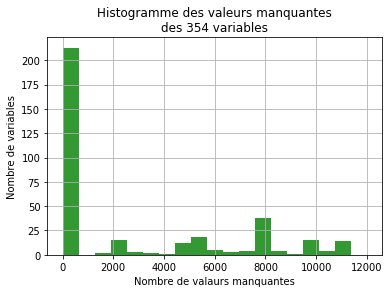

In [71]:
fig=plt.figure()
plt.title("Histogramme des valeurs manquantes\ndes 354 variables")
plt.ylabel(u'Nombre de variables')
plt.xlabel("Nombre de valaurs manquantes")
bins = np.linspace(0, 12000, 20)
plt.hist(A, bins, facecolor='g', alpha=0.8)
plt.grid()

In [65]:
B = A[A != 0]

In [66]:
B.shape

(161,)

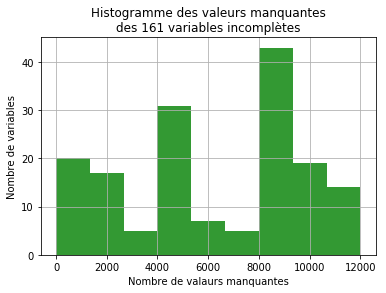

In [62]:
fig=plt.figure()
plt.title("Histogramme des valeurs manquantes\ndes 161 variables incomplètes")
plt.ylabel(u'Nombre de variables')
plt.xlabel("Nombre de valaurs manquantes")
bins = np.linspace(0, 12000, 10)
plt.hist(B, bins, facecolor='g', alpha=0.8)
plt.grid()

In [7]:
sub_cdv = cdv.loc[:,["NOT_FAMI", "NOT_PROF", "NOT_AMIS",
                   "NOT_COHE", "NOT_POLI", "NOT_LIBR", 
                   "NOT_LOG", "NOT_CAD", "ANNEEFUZ", "INTER6"]]

In [8]:
sub_cdv.shape

(11131, 10)

In [9]:
sub_cdv.head()

,NOT_FAMI,NOT_PROF,NOT_AMIS,NOT_COHE,NOT_POLI,NOT_LIBR,NOT_LOG,NOT_CAD,ANNEEFUZ,INTER6
0,5.0,6.0,6.0,6.0,3.0,6.0,NaN,NaN,2015,373001
1,7.0,6.0,6.0,7.0,5.0,6.0,NaN,NaN,2015,373002
2,7.0,6.0,6.0,NaN,5.0,4.0,NaN,NaN,2015,373003
3,7.0,5.0,6.0,6.0,5.0,6.0,NaN,NaN,2015,373004
4,7.0,7.0,6.0,6.0,6.0,7.0,NaN,NaN,2015,373005


In [10]:
cdv1718 = sub_cdv.loc[sub_cdv["ANNEEFUZ"].isin([2017,2018]),:]

In [11]:
cdv1718.describe()

,NOT_FAMI,NOT_PROF,NOT_AMIS,NOT_COHE,NOT_POLI,NOT_LIBR,NOT_LOG,NOT_CAD,ANNEEFUZ,INTER6
count,5947.000000,5911.000000,5934.000000,5916.000000,5904.000000,5913.000000,5932.000000,5925.000000,6036.000000,6036.000000
mean,6.206491,4.714600,5.216212,4.617478,3.658706,5.410621,5.510789,5.687595,2017.499669,396506.768058
std,1.492127,1.740409,1.337627,1.360557,1.678520,1.280449,1.214502,1.216359,0.500041,5075.357643
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,390001.000000
25%,6.000000,4.000000,4.000000,4.000000,2.000000,5.000000,5.000000,5.000000,2017.000000,391509.750000
50%,7.000000,5.000000,5.000000,5.000000,4.000000,6.000000,6.000000,6.000000,2017.000000,393019.500000
75%,7.000000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,7.000000,2018.000000,401508.250000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2018.000000,403018.000000


In [12]:
np.sum(cdv1718.isnull())

NOT_FAMI     89
NOT_PROF    125
NOT_AMIS    102
NOT_COHE    120
NOT_POLI    132
NOT_LIBR    123
NOT_LOG     104
NOT_CAD     111
ANNEEFUZ      0
INTER6        0
dtype: int64

In [13]:
cdv1718.shape

(6036, 10)

In [14]:
#cdv1718.dropna(inplace=True)
#cdv1718.shape

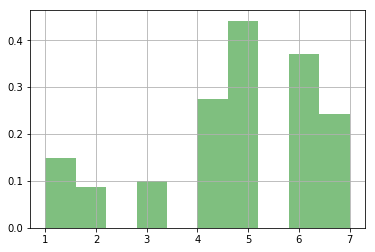

In [18]:
#startTime = time.time()
fig=plt.figure()
#plt.title(u"Histogramme du poids des produits")
#plt.ylabel(u'Probabilité')
#plt.xlabel("Poids en gramme")
#bins = np.linspace(0, 20, 1)
plt.hist(cdv1718["NOT_PROF"].dropna(), normed=True, facecolor='g', alpha=0.5)
plt.grid()
#print("...done in %0.1f s...." % (time.time() - startTime)) 